### Exploratory analysis & Outlier detection



**Load packages**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#### Load data

In [2]:
df = pd.read_csv('clean data/socioec_factors.csv', index_col=0)
df.sample(5)

,Country,GDP per capita (current US$/inhab),Human Development Index (HDI) [highest = 1] (-),Population density (inhab/km2),Rural population (1000 inhab),Rural population with access to safe drinking-water (JMP) (%),Total population with access to safe drinking-water (JMP) (%),Urban population (1000 inhab),Urban population with access to safe drinking-water (JMP) (%),DEC alternative conversion factor (LCU per US$),...,"Mortality rate, infant (per 1,000 live births)","Official exchange rate (LCU per US$, period average)","PPP conversion factor, GDP (LCU per international $)","PPP conversion factor, private consumption (LCU per international $)",Population aged 25-64 years (thousands),Population growth (annual %),"Prevalence of HIV, total (% of population ages 15-49)",Price level ratio of PPP conversion factor (GDP) to market exchange rate,Total debt service (% of GNI),Total population (thousands)
82,MDG,515.285585,0.518,43.539468,16231.870,35.3,51.5,9339.025,81.6,2769.56,...,41.0,2769.56,888.430,852.82,8507.0,2.70,0.18,0.32,0.96,24250.0
67,JOR,4195.802289,0.722,109.559371,897.788,92.3,96.9,8804.565,97.8,0.70,...,15.2,0.70,0.310,0.36,3780.2,3.80,NaN,0.40,4.62,9209.0
102,PAN,15196.397340,0.793,54.611290,1337.579,88.6,94.7,2761.008,97.7,1.00,...,14.8,1.00,0.538,0.54,1896.8,1.70,NaN,0.54,NaN,3969.6
99,NZL,43651.468216,0.920,17.563909,636.894,100.0,100.0,4068.924,100.0,1.32,...,4.6,1.32,1.452,1.60,2362.0,1.68,0.10,1.08,NaN,4612.6
63,IRQ,4980.948425,0.684,86.317914,11375.936,70.1,86.6,26898.682,93.8,1172.66,...,24.6,1173.06,556.034,545.40,13194.6,3.26,NaN,0.50,NaN,35461.0


In [3]:
df.rename(columns = {#'country':'Country',
                     'Human Development Index (HDI) [highest = 1] (-)': 'HDI',
                     'Rural population (1000 inhab)' : 'rural_pop',
                     'Urban population (1000 inhab)' : 'urban_pop',
                     'Rural population with access to safe drinking-water (JMP) (%)' : 'rural_water',
                     'Urban population with access to safe drinking-water (JMP) (%)' : 'urban_water',
                     'Life expectancy at birth, total (years)':'life_ex', 
                     'Mortality rate, infant (per 1,000 live births)': 'mort_rate', 
                     'Population growth (annual %)': 'pop_growth',
                     'GDP per capita, PPP (constant 2011 international $)': 'GDP_pcp' }, inplace = True)
df.sample(5)

,Country,GDP per capita (current US$/inhab),HDI,Population density (inhab/km2),rural_pop,rural_water,Total population with access to safe drinking-water (JMP) (%),urban_pop,urban_water,DEC alternative conversion factor (LCU per US$),...,mort_rate,"Official exchange rate (LCU per US$, period average)","PPP conversion factor, GDP (LCU per international $)","PPP conversion factor, private consumption (LCU per international $)",Population aged 25-64 years (thousands),pop_growth,"Prevalence of HIV, total (% of population ages 15-49)",Price level ratio of PPP conversion factor (GDP) to market exchange rate,Total debt service (% of GNI),Total population (thousands)
31,CPV,3239.065521,0.647,133.374194,189.808,87.3,91.7,356.580,94.0,92.60,...,17.0,92.60,50.398,49.46,239.0,1.24,0.60,0.54,2.62,524.6
120,SYC,15867.054505,0.800,209.604348,41.437,95.7,95.7,53.300,95.7,13.00,...,12.8,13.00,7.950,8.98,52.2,1.62,NaN,0.62,NaN,94.8
133,USA,60159.823417,0.919,33.059444,58215.947,98.2,99.2,266243.516,99.4,1.00,...,6.0,1.00,1.000,1.00,167636.2,0.68,0.40,1.00,NaN,320810.6
20,BWA,7595.147598,0.724,3.790556,717.290,92.3,96.2,1574.371,99.2,9.74,...,31.6,9.74,4.430,4.80,903.2,1.56,22.14,0.46,1.18,2127.6
131,UGA,634.769133,0.522,170.426777,32920.646,75.8,79.0,9942.312,95.5,2985.62,...,39.4,3091.72,1144.770,1133.50,11368.8,3.50,6.36,0.40,0.98,38329.6


In [5]:
# create new features
df['r_u'] = df['rural_pop']/df['urban_pop']
df['r_u_access'] = df['rural_water']/df['urban_water']

In [6]:
df_ws = pd.read_csv('clean data/water_stress.csv')
df_ws = df_ws.rename(columns = {'Water stress (MDG)' :
                                            'stress', 'Water use efficiency (SDG)' : 'efficiency'})
df_ws =df_ws.drop(['Water stress (SDG)'], axis = 1)
df_ws.sample(5)

,Unnamed: 0,Country,stress,efficiency
19,19,BLZ,0.464710,13.283185
23,23,BRN,1.082353,NaN
107,107,MLI,4.321667,1.721867
10,10,BDI,2.234365,6.142078
110,110,MNE,NaN,20.848901


In [7]:
# merge aquastat with water stress. 
# left merge to only keep aquastat countries
df_piv_ws = pd.merge(df, df_ws, on=["Country"], how='left')
df_piv_ws.sample(5)

,Country,GDP per capita (current US$/inhab),HDI,Population density (inhab/km2),rural_pop,rural_water,Total population with access to safe drinking-water (JMP) (%),urban_pop,urban_water,DEC alternative conversion factor (LCU per US$),...,pop_growth,"Prevalence of HIV, total (% of population ages 15-49)",Price level ratio of PPP conversion factor (GDP) to market exchange rate,Total debt service (% of GNI),Total population (thousands),r_u,r_u_access,Unnamed: 0,stress,efficiency
90,MRT,1597.806534,0.524,4.155011,2085.278,57.1,57.9,2334.906,58.4,32.78,...,2.88,0.24,0.36,3.82,4048.2,0.893089,0.977740,113.0,11.826316,3.832713
114,SLE,494.765953,0.435,103.574315,4410.710,47.8,62.6,3146.502,84.9,5521.40,...,2.20,1.60,0.36,1.04,7174.0,1.401782,0.563015,145.0,0.132625,8.197602
21,CAF,428.701433,0.376,7.377481,2749.797,54.4,68.5,1909.283,89.6,550.44,...,0.72,4.12,0.52,1.00,4507.8,1.440225,0.607143,26.0,0.051418,16.832521
55,GTM,4470.965390,0.649,155.339976,8341.671,86.8,92.8,8571.832,98.4,7.64,...,1.70,0.34,0.50,4.70,16253.8,0.973149,0.882114,67.0,2.598780,18.367914
79,LVA,15527.246924,0.849,30.216772,622.436,98.3,99.3,1327.234,99.8,0.86,...,-0.92,0.40,0.60,NaN,1997.8,0.468972,0.984970,100.0,0.518317,132.417395


In [8]:
#final dataset 

df1 = df_piv_ws[['Country', 'HDI', 'r_u', 'r_u_access', 'pop_growth','mort_rate','life_ex','GDP_pcp']]
df1.head()

,Country,HDI,r_u,r_u_access,pop_growth,mort_rate,life_ex,GDP_pcp
0,AFG,0.493,2.960340,0.601023,3.06,53.2,63.4,2226.0
1,AGO,0.576,0.542292,0.374005,3.44,58.6,59.2,7859.4
2,ALB,0.789,0.683985,1.003161,-0.20,8.6,78.0,12227.4
3,ARE,0.864,0.159447,1.004016,0.74,7.0,77.2,64243.0
4,ARG,0.832,0.089930,1.010101,1.08,10.2,76.0,23732.2


In [9]:
df_tmp = df1.copy()

### Univariate exploratory analysis

Checking the distribution per indicator

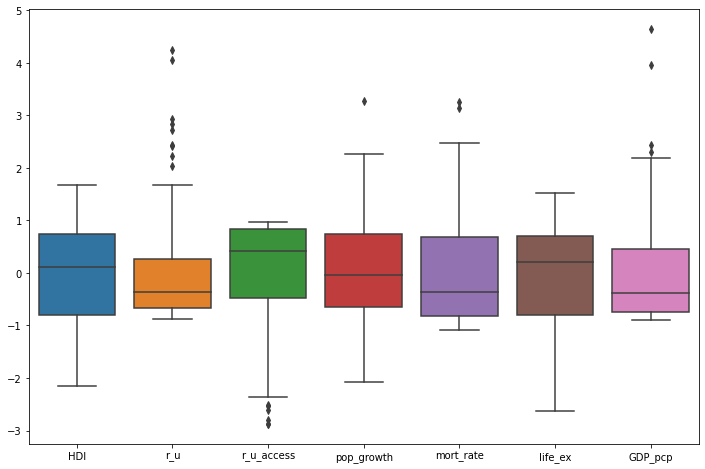

In [33]:
fig = plt.figure(figsize = (12,8))
sns.boxplot(data=df_tmp)
plt.show()

- From the previous boxplots, we can see there are some outliers in case of _r-u_, _ru-access_, _GDP_ . Also, few outlier cases on pop_growth and mort_rate. We will explore this in more depth afterwards.

In [11]:
df_tmp.describe()

,HDI,r_u,r_u_access,pop_growth,mort_rate,life_ex,GDP_pcp
count,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000,138.000000
mean,0.700057,1.177456,0.859069,1.557801,24.612766,71.188571,18407.337681
std,0.152312,1.346868,0.169591,1.281321,20.820144,7.761768,19907.620317
min,0.373000,0.000000,0.372727,-3.600000,2.000000,50.800000,831.400000
25%,0.577000,0.260017,0.777436,0.740000,7.800000,65.450000,3886.000000
50%,0.717000,0.683985,0.930000,1.400000,17.400000,72.500000,11108.900000
75%,0.813000,1.539356,1.000000,2.500000,38.800000,76.300000,27180.850000
max,0.953000,6.870257,1.024084,5.740000,92.200000,83.000000,110631.000000


First, we standardize the variables to explore the relationship between them. 

In [12]:
# transform variables (std) before heatmap
scaler = StandardScaler()
# get numeric data
num_d = df_tmp.drop(["Country"], axis =1)

In [13]:
# update the cols with their normalized values
df_tmp[num_d.columns] = scaler.fit_transform(num_d)

- Here I am removing some NA...but this should come clean from preproc..

In [17]:
print(df_tmp.isna().sum(axis=0))
df_tmp = df_tmp.dropna(axis=0)

Country       0
HDI           0
r_u           0
r_u_access    0
pop_growth    0
mort_rate     0
life_ex       0
GDP_pcp       0
dtype: int64


<AxesSubplot:ylabel='Country'>

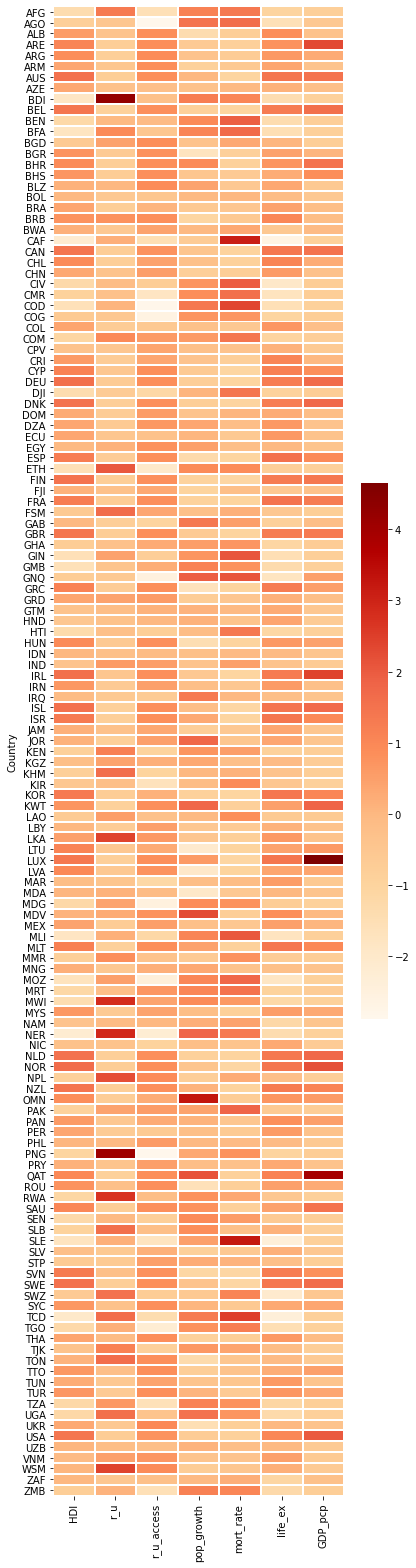

In [22]:
df_tmp.set_index(['Country'],inplace=True) #setting index so heatmap can be plotted
plt.subplots(figsize=(6,.2*(len(df_tmp.index))))
sns.heatmap(df_tmp,      
            cbar_kws={'fraction' : 0.08}, # shrink colour bar
            cmap='OrRd', # use orange/red colour map
            linewidth=1)

- From above we can see that the outliers from GDP are countries like QAT, LUX, ARE, IRL ...
- PNG & BDI have high ratio of rural pop (r_u)
- OMN QAT MDV have high pop growth 
- SLE, CAF, TCD have large mort_rate

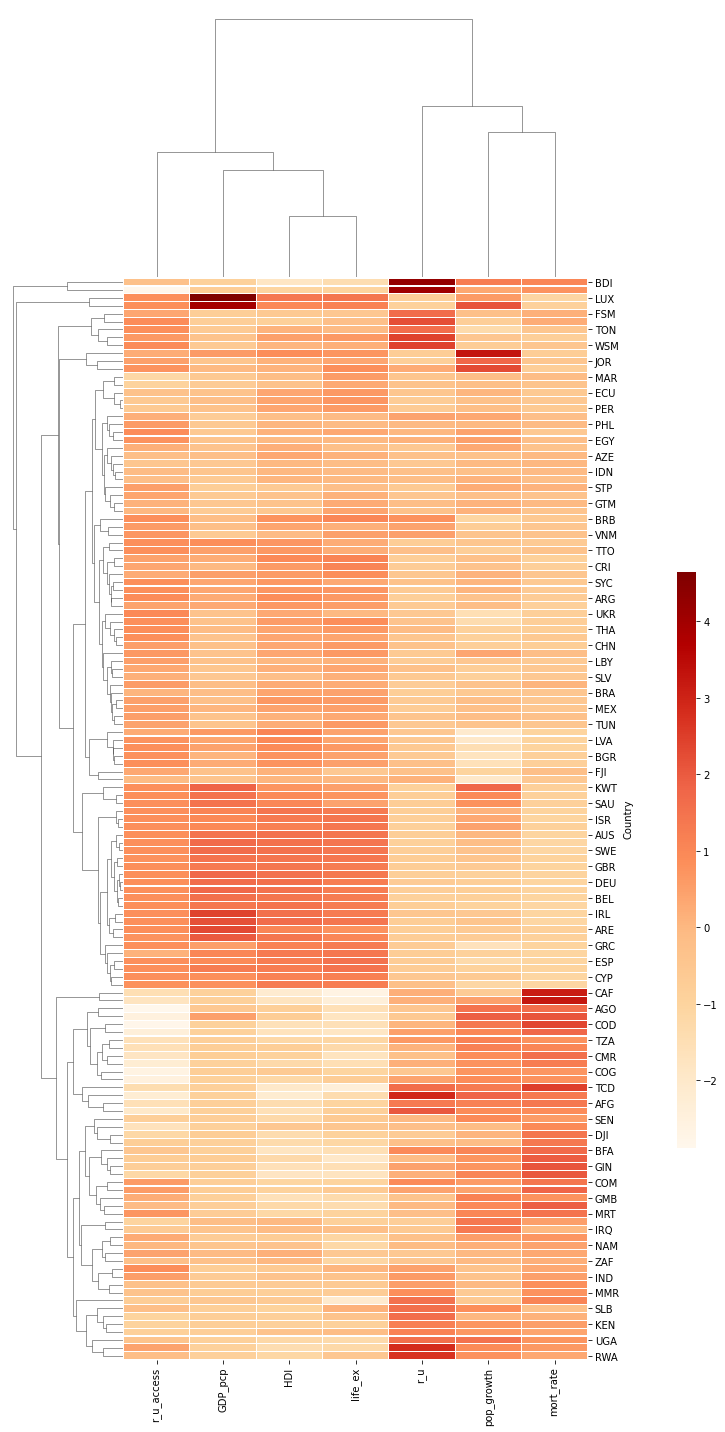

In [28]:
sns.clustermap(df_tmp, 
               linewidth=0.05,
               cmap='OrRd',
               figsize=(9,(.18*len)),
               cbar_pos=(1.05, .2, .03, .4))

- Heatmap shows that HDI and life_exp are highly correlated, as well as, pop_growth and mort_rate

**Checking the correlation between variables** 

<AxesSubplot:>

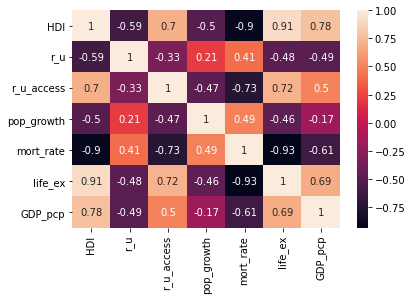

In [32]:
corr_data = df_tmp.corr()
sns.heatmap(corr_data,annot=True)

- From above heatmap, we can see mortality rate is highly negatively correlated with HDI (-0.9) and life_ex (-0.93). 

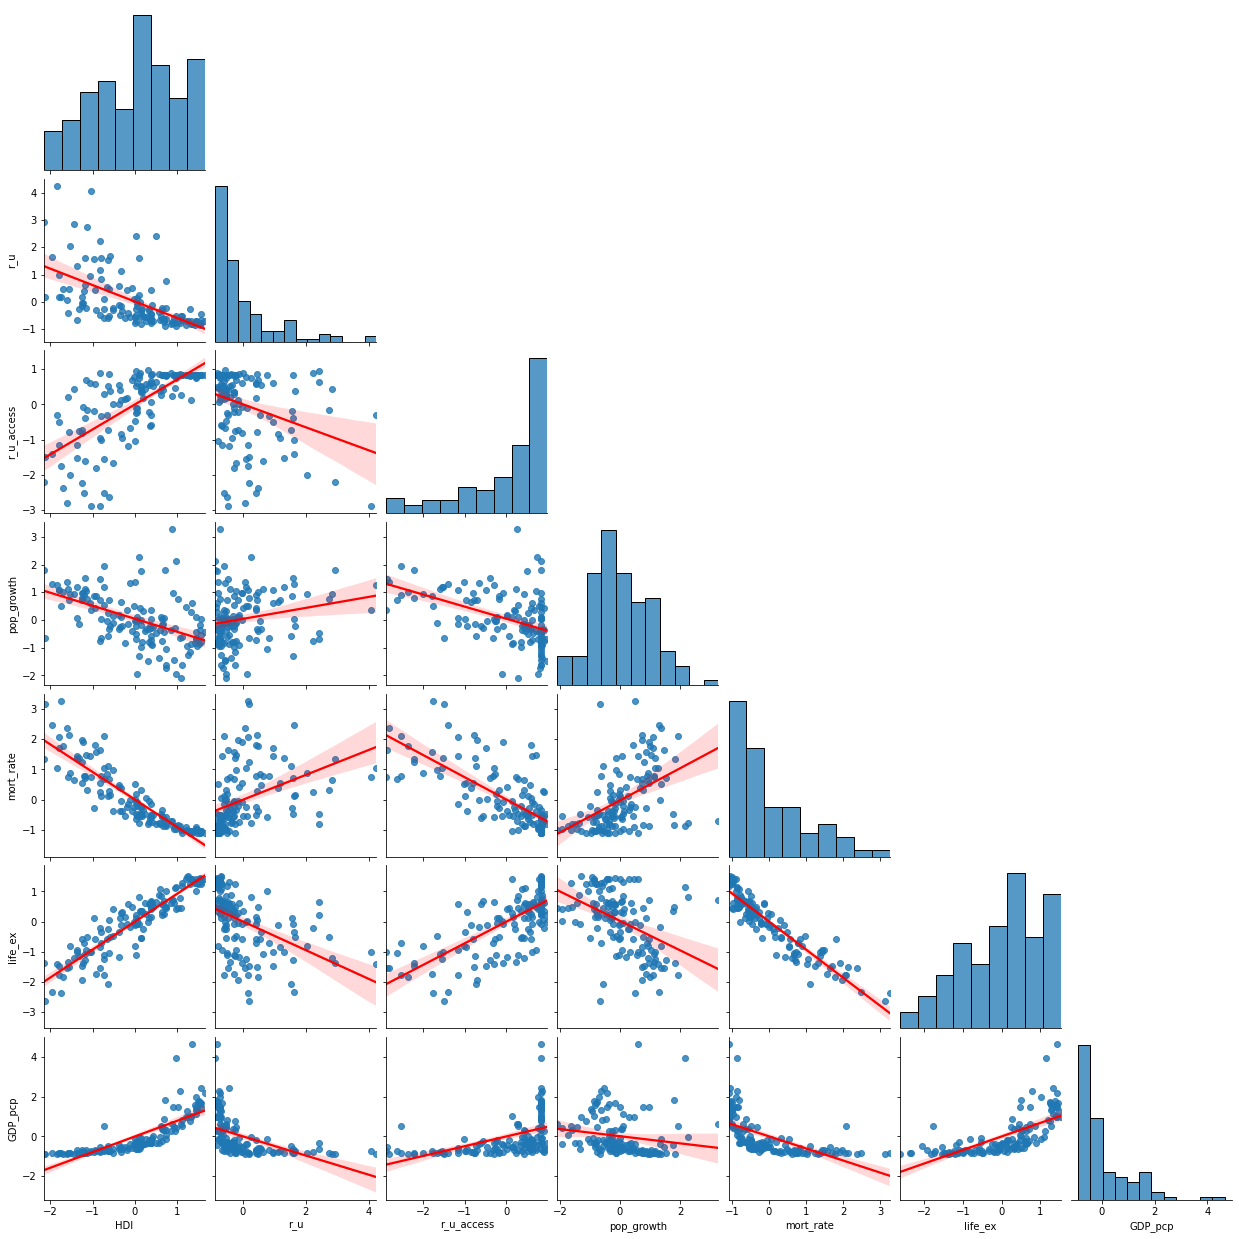

In [51]:
g= sns.pairplot(df_tmp,kind="reg",corner =True, 
             plot_kws={'line_kws':{'color':'red'}})

Above, a correlogram to explore in depth relationship between vars.

### Exploratory analysis AquaStat and Water Stress




In [ ]:
# After removing LUX
 
#g.set(xscale="log", yscale = "log")

df_replot = df_piv_ws_17.loc[~((df_piv_ws_17['Country'] == 'LUX')),:]
g = sns.relplot(x="Population density (inhab/km2)", y='Water use efficiency (SDG)',
               size="Population density (inhab/km2)",
                hue = 'Human Development Index (HDI) [high',
                alpha =0.3,
      #          style="event",
      #          col="country",
                height=8, aspect=.8, 
                #kind="line", 
              sizes=(0,0.5*max(df_replot["Population density (inhab/km2)"])),
                data=df_replot)

In [ ]:
g = sns.relplot(x="GDP per capita (current US$/inhab)", y='Water use efficiency (SDG)',
                size="Population density (inhab/km2)",
                hue = 'Human Development Index (HDI) [high',
                alpha =0.3,
      #         style="event",
      #         col="country",
                height=5, aspect=.8, 
                #kind="line", 
                sizes=(0,0.5*max(df_piv_ws_17["Population density (inhab/km2)"])),
                data=df_piv_ws_17)